## COGS 108 - Final Project

## Introduction and Background

## Part 0: Setup

In [6]:
# Imports
import pandas as pd
import numpy as np

## Part 1: Data Cleaning

## 1a) Condense dat files: block hash, transaction overview
Drop irrelevant columns in bh.dat and tx.dat; store result dataframes to bh.dat and tx.dat.

Result:

bh.dat: 

| Block ID | Block Timestamp |

tx.dat: 

|Transaction ID | Block ID |

In [5]:
# file path for data
bh_filepath = 'data/bh.dat'
tx_filepath = 'data/tx.dat'

# read data
df_block_hash = pd.read_csv(bh_filepath, sep = '\t')
df_transaction = pd.read_csv(tx_filepath, sep = '\t')

# set column names
df_block_hash.columns = ['block ID', 'hash', 'timestamp', 'number of transactions']
df_transaction.columns = ['transaction ID', 'block ID', 'input count', 'output count']

# drop irrelevant columns
df_block_hash.drop(['hash', 'number of transactions'], axis = 1, inplace = True)
df_transaction.drop(['input count', 'output count'], axis = 1, inplace = True)

# check head after drop
print(df_block_hash.head())
print(df_transaction.head())

# write block hash dataframe to a new dat file
bh_drop_filepath = 'data/bh.dat'
df_block_hash.to_csv(path_or_buf = bh_drop_filepath, sep = '\t', index = False, columns = ['block ID', 'timestamp'])

tx_drop_filepath = 'data/tx.dat'
df_transaction.to_csv(path_or_buf = tx_drop_filepath, sep = '\t', index = False, 
                      columns = ['transaction ID', 'block ID'])

FileNotFoundError: [Errno 2] File b'data/bh.dat' does not exist: b'data/bh.dat'

## 1b) Condense dat files: transaction input
Split txin.dat to small dat files; drop irrelevant columns; store result dataframes to txin_1.dat to txin_11.dat.

Result:

txin_1.dat - txin_11.dat: 

| Transaction ID | Address ID |

In [6]:
# split transaction_input file
!split -l 70000000 data/txin.dat t

# set filepath
num_txin_file = 11

txin_input_filepath = ['txin/taa', 'txin/tab', 'txin/tac', 'txin/tad', 'txin/tae', 'txin/taf', 'txin/tag', 'txin/tah',
                      'txin/tai', 'txin/taj', 'txin/tak']
txin_output_filepath = ['txin/txin_1.dat', 'txin/txin_2.dat', 'txin/txin_3.dat', 'txin/txin_4.dat', 'txin/txin_5.dat', 
                        'txin/txin_6.dat', 'txin/txin_7.dat', 'txin/txin_8.dat', 'txin/txin_9.dat', 'txin/txin_10.dat', 
                        'txin/txin_11.dat']

# for loop to drop irrelevant columns in transaction_input
for x in range(num_txin_file):
    curr_input_filepath = txin_input_filepath[x]
    curr_output_filepath = txin_output_filepath[x]
    
    df_txin = pd.read_csv(curr_input_filepath, sep = '\t')
    
    df_txin.columns = ['transaction ID', 'input sequence', 'previous transaction ID', 'previous output sequence', 
                       'address ID', 'sum']
    
    df_txin.drop(['input sequence', 'previous transaction ID', 'previous output sequence', 'sum'], 
                 axis = 1, inplace = True)
    
    df_txin.to_csv(path_or_buf = curr_output_filepath, sep = '\t', index = False, 
                   columns = ['transaction ID', 'address ID'])

split: data/txin.dat: No such file or directory


FileNotFoundError: [Errno 2] File b'txin/taa' does not exist: b'txin/taa'

## 1c) Condense dat files: transaction output
Split txout.dat to small dat files; drop irrelevant columns; store result dataframes to txout_1.dat to txout_12.dat.

Result:

txout_1.dat - txout_12.dat: 

| Transaction ID | Address ID |

In [ ]:
# split transaction_output file
!split -l 70000000 data/txout.dat m

# set filepath
num_txout_file = 12

txout_input_filepath = ['txout/maa', 'txout/mab', 'txout/mac', 'txout/mad', 'txout/mae', 'txout/maf', 'txout/mag', 
                        'txout/mah', 'txout/mai', 'txout/maj', 'txout/mak', 'txout/mal']
txout_output_filepath = ['txout/txout_1.dat', 'txout/txout_2.dat', 'txout/txout_3.dat', 'txout/txout_4.dat', 
                         'txout/txout_5.dat', 'txout/txout_6.dat', 'txout/txout_7.dat', 'txout/txout_8.dat', 
                         'txout/txout_9.dat', 'txout/txout_10.dat', 'txout/txout_11.dat', 'txout/txout_12.dat']

# for loop to drop irrelevant columns in transaction_output
for x in range(num_txout_file):
    curr_input_filepath = txout_input_filepath[x]
    curr_output_filepath = txout_output_filepath[x]
    
    df_txout = pd.read_csv(curr_input_filepath, sep = '\t')
    
    df_txout.columns = ['transaction ID', 'output sequence', 'address ID', 'sum']
    
    df_txout.drop(['output sequence', 'sum'], axis = 1, inplace = True)
    
    df_txout.to_csv(path_or_buf = curr_output_filepath, sep = '\t', index = False, 
                   columns = ['transaction ID', 'address ID'])

## 1d) Convert UNIX time to standard time
Implement a function that converts UNIX to standard time; add a column "year" in bh.dat.

Before: 

| Block ID | Block Timestamp |

After: 

| Block ID | Block Timestamp | Month | Year |

In [ ]:
from datetime import datetime
file='bh_simplified.dat'

df=pd.read_csv(file, sep='\t')

def getYear(data):
    d=datetime.fromtimestamp(data)
    return d.timetuple().tm_year
def getMonth(data):
    d=datetime.fromtimestamp(data)
    return d.timetuple().tm_mon

df['month']=df['timestamp'].apply(getMonth)
df['year']=df['timestamp'].apply(getYear)

df.to_csv('bh_readable.dat', sep='\t', index=False)

## 1e) Range of Block IDs for each year

In [ ]:
bh_filepath = 'data/bh_readable.dat'
df_block_hash = pd.read_csv(bh_filepath, sep = '\t')
df_block_hash.columns = ['blockID', 'timestamp', 'month', 'year']
df_block_hash.head()

range_block_each_year = {}

target_year = df_block_hash["year"][0]

target_block_start = 1
target_block_end = 1

for row in df_block_hash.itertuples():
    curr_year = row.year
    
    if curr_year > target_year:
        curr_block_id = row.blockID
        
        target_block_end = curr_block_id - 1
        
        range_block_each_year[target_year] = (target_block_start, target_block_end)
        
        target_block_start = curr_block_id
        
        target_year += 1
        
    if target_year == 2018:
        break
        
print(range_block_each_year)

## 1f) Range of Transaction IDs for each year

In [ ]:
tx_filepath = 'data/tx.dat'
df_tx = pd.read_csv(tx_filepath, sep = '\t')
df_tx.columns = ['transactionID', 'blockID']

range_tx_each_year = {}

for key in range_block_each_year:
    value = range_block_each_year[key]
    
    block_range_start = value[0]
    block_range_end = value[1]
    
    df_curr = df_tx[df_tx['blockID'] == block_range_start]
    df_curr.reset_index()
    tx_range_start = df_curr.iloc[0]['transactionID']
    
    df_curr = df_tx[df_tx['blockID'] == block_range_end]
    df_curr.reset_index()
    tx_range_end = df_curr.iloc[len(df_curr) - 1]['transactionID']
    
    range_tx_each_year[key] = (tx_range_start, tx_range_end)
    
print(range_tx_each_year)

## 1g) Re-split tx_in and tx_out dat files to groups of 2-year time periods


Used VIM to split up into 2-year chunks.

## 1h) Range of Address IDs for each year

In [7]:
data10 = pd.read_csv('TxinFiles/txin_2010.dat', sep='\t')
data11 = pd.read_csv('TxinFiles/txin_2011.dat', sep='\t')
data12 = pd.read_csv('TxinFiles/txin_2012.dat', sep='\t')
data13 = pd.read_csv('TxinFiles/txin_2013.dat', sep='\t')
data14 = pd.read_csv('TxinFiles/txin_2014.dat', sep='\t')
data15 = pd.read_csv('TxinFiles/txin_2015.dat', sep='\t')
data16 = pd.read_csv('TxinFiles/txin_2016.dat', sep='\t')
data17 = pd.read_csv('TxinFiles/txin_2017.dat', sep='\t')

/Users/hairy/anaconda2/envs/n/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data = [data10, data11, data12, data13, data14, data15, data16, data17]
years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

In [4]:
for frame in data:
    frame['address ID'] = pd.to_numeric(frame['address ID'], errors='coerce', downcast='integer')

In [5]:
max_array = []
for frame in data:
    tx_max = frame['address ID'].max()
    max_array.append(tx_max)

In [6]:
min_array = [data10['address ID'].min()]
for i in range(len(max_array)):
    min_array.append(max_array[i] + 1)

In [7]:
range_id_each_year = {}
for i in range(len(years)):
    range_id_each_year[years[i]] = (min_array[i], max_array[i])
pd.DataFrame(range_id_each_year).to_csv('tx.dat', sep='\t', index=False)
range_id_each_year

{'2010': (171, 176514),
 '2011': (176515, 2769557),
 '2012': (2769558, 8714741),
 '2013': (8714742, 24822602),
 '2014': (24822603, 58929852),
 '2015': (58929853, 115528140),
 '2016': (115528141, 210026230.0),
 '2017': (210026231.0, 369453964)}

## Part 2: Sample Datasets
Data files at this point:

block hash: bh.dat

transaction overview: tx.dat

transaction input: txin_2010.dat, txin_2012.dat, txin_2014.dat, txin_2016.dat

## 2a) Initialize the Dataframe
Initialize the following dataframe:

| Address ID | Year | NumTX |

Address ID: Bitcoin account identifier

Year: Year in which the Address ID has its first transaction

NumTx: Number of transactions in total belong to that Bitcoin Address ID

In [8]:
df_Addr_Year = pd.DataFrame()

## 2c) Sample Address ID

Randomly Sample 100 address IDs in each transaction input/output dat file.

Update the following columns in the dataframe:

| Address ID | Year |

In [ ]:
sampleNumber=200
minTxSamp=100

In [36]:
df_Addr_Year=pd.DataFrame()
vc=data10['address ID'].value_counts()
datadp=pd.DataFrame(vc)
datadp.columns=['NumTX']
datadp['Address ID']=datadp.index
datadp.reset_index(drop=True)
datadp=datadp[datadp['NumTX']>minTxSamp]
sample=datadp.sample(sampleNumber)
Temp=pd.DataFrame(columns=['Address ID', 'NumTX'])
Temp['Address ID']=sample['Address ID']
Temp['NumTX']=sample['NumTX']
Temp['Year']=2010
df_Addr_Year=pd.concat([df_Addr_Year, Temp])

,Address ID,NumTX,Year
129545,129545,51,2010
139525,139525,348,2010
152088,152088,1327,2010
114114,114114,27,2010
100647,100647,83,2010
88221,88221,25,2010
152971,152971,32,2010
56257,56257,35,2010
153157,153157,139,2010
69456,69456,35,2010


In [ ]:
vc=data16['address ID'].value_counts()
datadp=pd.DataFrame(vc)
datadp.columns=['NumTX']
datadp['Address ID']=datadp.index
datadp.reset_index(drop=True)
datadp=datadp[datadp['NumTX']>minTxSamp]
sample=datadp.sample(sampleNumber)
Temp=pd.DataFrame(columns=['Address ID', 'NumTX'])
Temp['Address ID']=sample['Address ID']
Temp['NumTX']=sample['NumTX']
Temp['Year']=2016
df_Addr_Year=pd.concat([df_Addr_Year, Temp])
df_Addr_Year

## 2d) Accumulate Number of Transactions

Iterate through all the transaction inputs and outputs; accumulate the numbers of transactions for each sample.

Update the following columns in the dataframe:

| NumTX |

In [38]:
#data_10_17 = [data10, data11, data12, data13, data14, data15, data16, data17]
data_10_15 = pd.concat([data10, data11, data12, data13, data14, data15])
df_Addr_Year['NumTX'] = 0
Temp = df_Addr_Year

In [16]:
for index, row in Temp.iterrows():
    amountOfTransactions = len(data_10_15[data_10_15['address ID'] == row['Address ID']])
    tx = int(df_Addr_Year[df_Addr_Year['Address ID']==row['Address ID']]['NumTX'])
    df_Addr_Year.loc[index, 'NumTX'] = tx + amountOfTransactions
df_Addr_Year.head()

,Address ID,Year,NumTX
0,249264,2010,2
1,261000,2010,1
2,261227,2010,1
3,267927,2010,1
4,270661,2010,0


In [39]:
data_16_17 = pd.concat([data16, data17])
Temp = df_Addr_Year[df_Addr_Year['Year']==2016]

In [40]:
for index, row in Temp.iterrows():
    amountOfTransactions = len(data_16_17[data_16_17['address ID'] == row['Address ID']])
    tx = int(df_Addr_Year[df_Addr_Year['Address ID']==row['Address ID']]['NumTX'])
    df_Addr_Year.loc[index, 'NumTX'] = tx + amountOfTransactions
df_Addr_Year.head()

,Address ID,Year,NumTX
0,249264.0,2010,0
1,261000.0,2010,0
2,261227.0,2010,0
3,267927.0,2010,0
4,270661.0,2010,0


36


[]

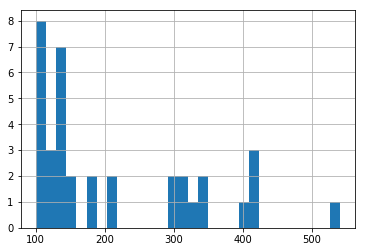

In [47]:
light=df_Addr_Year[df_Addr_Year['NumTX'].between(100, 1000)]
print(len(light))
plot=light['NumTX'].hist(bins=30)
plot.plot()
#df_Addr_Year

## Part 3: Normal Distribution and T-test
Apply Normal Distributions and T-tests to the following 2 groups of samples only:

Group 1:

Samples of Address IDs that have their first transaction in year 2010 or 2011

Group 2:

Samples of Address IDs that have their first transaction in year 2016 or 2017

## 3a) Mean number of transactions
What is the average number of transactions for address IDs from each of the 2 groups?

Get a taste of how different the means are.

In [40]:
#Create series of the number of transactions from each specified group
group1=df_Addr_Year[df_Addr_Year['Year']==2010]['NumTX']
group2=df_Addr_Year[df_Addr_Year['Year']==2016]['NumTX']
#Get means
print(group1.mean())
print(group2.mean())

429.48
70.97


## 3b) Normal Distribution Test
Check that each of the 2 groups has nearly normal distribution.

In [41]:
import scipy.stats as stats
from scipy.stats import kstest

print(stats.normaltest(group1))
print(stats.normaltest(group2))

NormaltestResult(statistic=92.00216280558374, pvalue=1.0519235673744788e-20)
NormaltestResult(statistic=82.38676647463134, pvalue=1.288074460008949e-18)


## 3c) Compare Number of Samples and Population
Check that the number of samples is < 10 % of the total population.

In [331]:
data_10_17 = [data2, data3, data4, data5]#, data6, data7, data8, data9]
totalPopulation = 0

for frame in data_10_17:
    totalPopulation = totalPopulation + len(frame)
#sampleTestPercentage = len(group1) / totalPopulation
sampleTestPercentage = (len(group1) + len(group2)) / totalPopulation
print('10% > ' + str(sampleTestPercentage) + '%')

10% > 8.157515090383227e-06%


## 3d) T-test
Apply the T-test to the 2 groups.

In [ ]:
# Code here

## Part 4: Analysis of Variance/ANOVA
Apply ANOVA to all the 4 groups of samples:

Group 1:

Samples of Address IDs that have their first transaction in year 2010 or 2011

Group 2:

Samples of Address IDs that have their first transaction in year 2012 or 2013

Group 3:

Samples of Address IDs that have their first transaction in year 2014 or 2015

Group 4:

Samples of Address IDs that have their first transaction in year 2016 or 2017

## 4a) Normal Distribution Test
Check that each group has nearly normal distribution.

In [ ]:
# Code here

## 4b) Compare Number of Samples and Population
Check that the number of samples is < 10 % of the total population.

In [ ]:
# Code here

## 4c) ANOVA test
Apply ANOVA to the 4 groups of samples.

In [ ]:
# Code here

## Part 5: Linear Model
Apply a Linear Model to the data.

Independent variable:

time: month and year when the address ID has its first transaction

Dependent variable:

NumTx: Number of total transactions for each address ID

## 5a) Create Linear Model

In [ ]:
# Code here

## 5b) Correlation Coefficient

In [ ]:
# Code here

## 5c) Predict Number of Transactions from Age of Address ID

In [ ]:
# Code here

## Part 6: Further Analysis

## Privacy/Ethics Considerations

In accordance with the Safe Harbor Method, we removed all account numbers from our data set and replace them with an incrementing account number based on the order of appearance. Our data set does contain dates, but we do not consider this as an identifier because our unit of analysis is on the timescale of years. Which is too broad to be useful with the identification of Bitcoin users. 

## Conclusions and Discussion